## <b>ETL Process </b>

In this study, we utilize the widely used MNIST dataset from keras to classify handwritten digits using machine learning algorithms, without employing deep learning models. Using sklearn package

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#### Load data

In [3]:
train_data = np.array(pd.read_csv('mnist_train.csv', header=None))
test_data = np.array(pd.read_csv('mnist_test.csv', header=None))



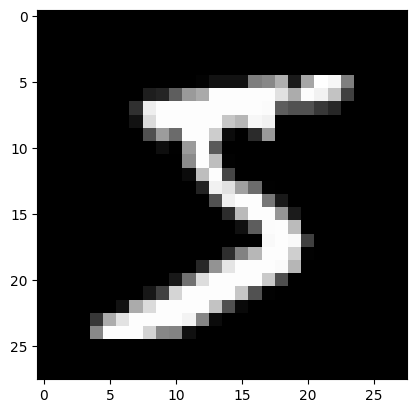

In [4]:
train_data[0][1:].reshape(28, 28)
plt.imshow(train_data[0][1:].reshape(28, 28), cmap='gray')

#### Preparing Train dataset

In [5]:
train_y = train_data[:][:,0]

In [6]:
train_y

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,))

In [7]:
train_x = train_data[:][:,1:]

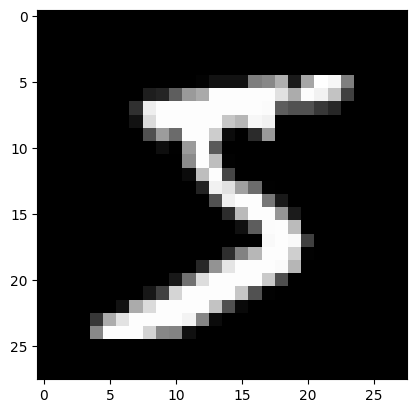

In [8]:
plt.imshow(train_x[0].reshape(28, 28), cmap='gray')

#### Preparing test dataset

In [9]:
test_y = test_data[:][:,0]
test_x = test_data[:][:,1:]

In [10]:
del train_data
del test_data

#### Data preprocessing

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

## <b>Modeling</b>

## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)

classifier.fit(train_x,train_y)

c:\Users\pc\Desktop\Projects_with_reports\ML\Digit-Classification-using-ML\Digit_venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [13]:
from sklearn import metrics

y_pred = classifier.predict(test_x)
metrics.accuracy_score(test_y,y_pred)


0.9251

# K-Nearest Neighbors (K-NN)

In [14]:
from sklearn.neighbors import  KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(train_x, train_y)

KNeighborsClassifier()

In [15]:
y_pred = classifier.predict(test_x)
metrics.accuracy_score(test_y,y_pred)

0.9688

## Decision Tree Classification

In [16]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [17]:
y_pred = classifier.predict(test_x)
metrics.accuracy_score(test_y,y_pred)

0.8864

## Kernel SVM

In [18]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(train_x, train_y)

SVC(random_state=0)

In [19]:
y_pred = classifier.predict(test_x)
metrics.accuracy_score(test_y,y_pred)

0.9791